In [173]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [174]:

df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [175]:
df.shape

(294478, 5)

##### We have 294478 rows

c. The number of unique users in the dataset.

In [176]:
df['user_id'].nunique()

290584

the number of unique users in the dataset are 290584

d. The proportion of users converted.

#### first i will find the mean of the converted 

In [177]:
df.converted.mean()

0.11965919355605512

now we will mutpliy 0.11965919355605512 * 100


The proportion of users converted will be=11.97%

e. The number of times the `new_page` and `treatment` don't match.

Here i will use grouping for the treatment and the new page. 
Then i use false so that when the 2 culomns are not match it will count it 

In [178]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page'))== False].shape[0]


3893

The number of times the `new_page` and `treatment` don't match is 3893

f. Do any of the rows have missing values?

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


#### There is no missing values in the dataset

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

The total numbers of rows we have in the dataset is 294478. However after we have found the number of not maching rows which is 3893, we can subtract it by the total number. 
By that way we will only have the match ones

In [180]:
# Check all the correct rows are removed 
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page'))] 

#  Make sure there are 290585 rows
df2.shape[0]

290585

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [181]:
df2['user_id'].nunique()

290584

The are 290584 unqiue users in the df2 

b. There is one **user_id** repeated in **df2**.  What is it?

In [182]:
df2.duplicated('user_id').sum()


1

c. What is the row information for the repeat **user_id**? 

In [183]:
df2.loc[df2.duplicated('user_id', keep=False), :]


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


The information for the repted rows are :
rows 1899 and 2893, both treatment group and the landing_page is new page and not converted.


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [184]:
df.drop_duplicates(inplace=True)
## check they duplecated removed
df.duplicated().sum()


0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

First i will look to the df2 dataset

In [185]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [186]:
## Now i will calculate the mean of the converted column
df2['converted'].mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [187]:
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [188]:
df2.query('group == "treatment"')['converted'].mean()

0.11880724790277405

d. What is the probability that an individual received the new page?

In [189]:
 df2.query("landing_page == 'new_page'").user_id.size / df2.user_id.size

0.5000636646764286

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

####  First, I want to use add check how long the period the test has been running


In [190]:
 df['timestamp'].min() 

'2017-01-02 13:42:05.378582'

In [191]:
df['timestamp'].max()

'2017-01-24 13:41:54.460509'


### The probability of conversion 
##### 11.95% ( The overall conversion)
##### 12.03% (The control 'old page')
##### 11.88% (The treatment 'new page')

**The above results are not sufficient evidence to conclude. As we can see the control and the treatment have a small difference and that not enough for the analysis if we have a high range of difference
that may be sufficient. Also when I check the time stamp I can see that the period for the test is not that long based on the number of the users in the data. it has been on test for only 22 days and for a huge number of users. In my opinion, I believe that more testing must be done**


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

>**H0** The new page is worse, or as good, as the old. $p_{new}$ - $p_{old}$  <=0

> **H1** The new page is better than old. $p_{new}$ - $p_{old}$ > 0


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [192]:
p_new = df2['converted'].mean()
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [193]:
p_old = df2['converted'].mean()
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [194]:
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [195]:
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

For Simulate i will use np.random.binomial(n, p, size)

In [196]:
# n = 1 trial size
#p = probabiity of trial
#size = number of trials run 

In [197]:
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted.mean() 

0.11925456434819112

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [198]:
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted.mean()

0.11796329694232967

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

To finde the difference i will subtract the new page converted and the old page converted with thier means

In [199]:
ob_difference = new_page_converted.mean() - old_page_converted.mean()
ob_difference

0.0012912674058614543

The observed simulated difference is -0.00017504318884072056

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [200]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new) 
    old_page_converted = np.random.binomial(1, p_old, n_old) 
    p_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_diff)

In [201]:
#convert to numpy array to plot
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [202]:
## Dived the treatment and control into 2 groups then i will subtract it 

treatment_actual_conv = df2.query('group == "treatment"')['converted'].mean() 
control_actual_conv = df2.query('group == "control"')['converted'].mean()

## To find the diffrence of both
obs_diff = treatment_actual_conv - control_actual_conv


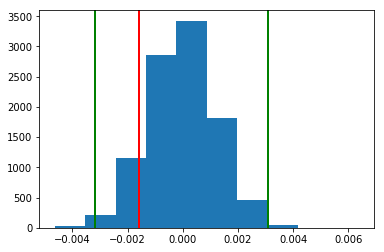

In [203]:
plt.hist(p_diffs)
# view 99% confidence interval 
low, upper = np.percentile(p_diffs, .5), np.percentile(p_diffs, 99.5)
low, upper 
plt.axvline(x=low, color='green', linewidth=2);
plt.axvline(x=upper, color='green', linewidth=2);
plt.axvline(obs_diff, color='red', linewidth=2); 


#### The diagram shows us a normal distribution based on the Central Limit Theorem. However, the size of confidence intervals depends on 3 things, one of which is the confidence level. The bigger the confidence level, the wider the interval is because a confidence level refers to the percentage of all possible samples that can be expected to include the true population parameter. based on that in this digram we have a 99% confidence interval.



j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [204]:

print("The actual_difference for the sampl statstic is ")
obs_diff



The actual_difference for the sampl statstic is 


-0.0015790565976871451

In [205]:
print("proportion of the p_diffs are greater than the actual difference observed p-value is")
p_diffs = np.array(p_diffs)
p_value = (p_diffs > obs_diff).mean()
p_value

proportion of the p_diffs are greater than the actual difference observed p-value is


0.90039999999999998

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In this part, I can explain that our alternative hypothesis is  p_new > p_old and the probability that our observed statistic comes from this distribution is by that red line to the right.  As we can see this is more than half of our distribution and observed statistic does fall within this range and supporting the null hypothesis which is old page converts better -or the same as- the new. Also, in this part, I have computed that the proportion of the p_diffs is greater than the actual difference. In the scientific studies, we call this value p-value which is mean the probability of observing our statistic, or more extreme values in favor of the alternative if the null is true.**
>To further explain we have types of error in the p-value such as : 
1. Type I error: Deciding the new page (alternative) is better but really the old page (null) is better (this is the worst type of error).
2. Type II error: Deciding the old page (null) is better but really the new page (alternative) is better. 

>To sum up,  the result shows us that 0.9011 which means the p-value is larger than 0.05. Based on that we do not have evidence that the new page is better than the old. In this case, we fail to reject the null and that’s mean it is better to still use the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [206]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0] 
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0] 
n_old = df2.query("landing_page == 'old_page'").shape[0] 
n_new = df2.query("landing_page == 'new_page'").shape[0]
## to show the results
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145311)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [207]:
## I will modify the function parameter -alternative- from two-sided to smaller to achieve the alt hypotheses  new > old

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new ], [n_old, n_new], alternative='smaller')

In [208]:
p_value

0.90517370514059103

In [209]:
z_score

1.3116075339133115

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**This is another test to make us dicide if we will accept or rejct the null. After doing the z_score test we can make sure that the p-value not higher than 0.95. Based on that we accept the null and reject the alterntive. and yest this findings agreed with part j & k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**I will use the Logistic Regression due to the predict 1 of 2 possible outcomeswhich are the**
* user will convert or not depending on an old or new page

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [210]:
df2['intercept'] = 1 

## Because i have categorical variables i will use the dummies
df2[['control', 'treatment']] = pd.get_dummies(df2['group']) 
df2[['new_page', 'old_page']] = pd.get_dummies(df2['landing_page']) 

## View the head to make sure the new columns are as supposed to be
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [211]:
## Because the output is categorical we will use the logit
from scipy import stats 
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df) 

 

loR= sm.Logit(df2['converted'], df2[['intercept', 'treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [212]:
## First i will make fit for it then a summary

results = loR.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:               8.085e-06
Time:                        19:34:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

>**The p-value associated with ab_page(treatment)= 0.190. However, the difference from part II is for the A/B test, the null hypotheses declare that the old page is better than the new page or as same as the new page which is a one-tailed test. On the other hand, the regression is a two-tailed test and that make the p-value different in both**


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**In my opinion, if we add additional factories it might have a number of disadvantages. For instance, the regression model is a liner so X related to Y but when there are a number of variables it will cause multicollinearity or collinearity that means one factor related to another and that might end up by making those variables correlating.**



g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [213]:
##load data
countries_df = pd.read_csv('./countries.csv') 

In [214]:
## I will use a (completed_df) to merge the additional columns
completed_df = df2.merge(countries_df, on='user_id', how='inner')

## Check if the merge is correct
completed_df.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,new_page,old_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,1,US


In [215]:
## to check the data in this culomn
countries_df['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [216]:
## Because i have categorical variables i will use the dummies
completed_df[['CA', 'UK', 'US']] = pd.get_dummies(completed_df['country']) 

## to check if it worked
completed_df.head() 

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,new_page,old_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,0,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,0,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,1,US,0,0,1


In [217]:
## Because the output is catogrical we will use the logit
from scipy import stats 
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)  

loR= sm.Logit(completed_df['converted'], completed_df[['intercept', 'CA', 'UK']])

In [218]:
## First i will make fit for it then a summary

results = loR.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:               1.521e-05
Time:                        19:34:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.315      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

> **The p-value above is greater than 0.05. Based on that country dose not affect the conversion because there is no difference between counties**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [219]:
## make new column called group_country wich will merge the group and the country.
completed_df['group_country'] = completed_df['group'] + '_' + completed_df['country']
completed_df.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,new_page,old_page,country,CA,UK,US,group_country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1,US,0,0,1,control_US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1,US,0,0,1,control_US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,0,US,0,0,1,treatment_US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,0,US,0,0,1,treatment_US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,1,US,0,0,1,control_US


In [220]:
## Because i have categorical variables i will use the dummies

completed_df = completed_df.join(pd.get_dummies(completed_df['group_country']))
completed_df.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,new_page,old_page,...,CA,UK,US,group_country,control_CA,control_UK,control_US,treatment_CA,treatment_UK,treatment_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1,...,0,0,1,control_US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1,...,0,0,1,control_US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,0,...,0,0,1,treatment_US,0,0,0,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,0,...,0,0,1,treatment_US,0,0,0,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,1,...,0,0,1,control_US,0,0,1,0,0,0


In [221]:
## Because the output is catogrical we will use the logit
from scipy import stats 
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df) 

loR= sm.Logit(completed_df['converted'], completed_df[['intercept', 'CA', 'UK', 'control_CA', 'control_UK' ]])


In [222]:
## First i will make fit for it then a summary

results = loR.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            4
Date:                Wed, 24 Jun 2020   Pseudo R-squ.:               2.417e-05
Time:                        19:34:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2729
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.315      0.000      -2.010      -1.983
CA            -0.0747      0.038     -1.979      0.048      -0.149      -0.001
UK             0.0153      0.018      0.876      0.381      -0.019       0.050
control_CA     0.0674      0.052      1.297      0.195      -0.034       0.169
control_UK    -0.0108      0.023     -0.475      0.635      -0.056       0.034
==============================================================================
"""

> **As we can see the p-value in both 'control_CA' and 'control_UK' have a grater value than 0.05. Based on that there is no significant effect on the interaction of the pages**

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [223]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0